# Data Analysis of New York housing prices

In this project we'll make an data analysis about New York housing market.</br>
The data I'll be using is available in [Kaggle](https://www.kaggle.com/datasets/nelgiriyewithana/new-york-housing-market), where you can download and do your own analysis.

## Reading and understanding the data

First of all we'll read the .csv file with pandas, after that we'll take a look at the data.

In [1]:
import pandas as pd

housing = pd.read_csv('/content/drive/MyDrive/Projetos pessoais/NY-House-Dataset.csv')

housing.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856


In [2]:
housing.columns

Index(['BROKERTITLE', 'TYPE', 'PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT',
       'ADDRESS', 'STATE', 'MAIN_ADDRESS', 'ADMINISTRATIVE_AREA_LEVEL_2',
       'LOCALITY', 'SUBLOCALITY', 'STREET_NAME', 'LONG_NAME',
       'FORMATTED_ADDRESS', 'LATITUDE', 'LONGITUDE'],
      dtype='object')

In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4801 entries, 0 to 4800
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BROKERTITLE                  4801 non-null   object 
 1   TYPE                         4801 non-null   object 
 2   PRICE                        4801 non-null   int64  
 3   BEDS                         4801 non-null   int64  
 4   BATH                         4801 non-null   float64
 5   PROPERTYSQFT                 4801 non-null   float64
 6   ADDRESS                      4801 non-null   object 
 7   STATE                        4801 non-null   object 
 8   MAIN_ADDRESS                 4801 non-null   object 
 9   ADMINISTRATIVE_AREA_LEVEL_2  4801 non-null   object 
 10  LOCALITY                     4801 non-null   object 
 11  SUBLOCALITY                  4801 non-null   object 
 12  STREET_NAME                  4801 non-null   object 
 13  LONG_NAME         

At the first glance we can produce a data dictionary of what each column mean.</br>

Data dictionary:
- <b>BROKERTITLE</b>: This column contains the name of the broker.</br>
- <b>TYPE</b>: This column is about the type of the house.</br>
- <b>PRICE</b>: This column contains the price of the house in U$.</br>
- <b>BEDS</b>: This column contains the number of bedrooms in the house.</br>
- <b>BATH</b>: This column contains the number of bathrooms in the house.</br>
- <b>PROPERTYSQFT</b>: This column contains the area of the property in square foots.</br>
- <b>ADDRESS</b>: This column contains the full address of the house.</br>
- <b>STATE</b>: This column contains the state where the house is.</br>
- <b>MAIN_ADDRESS</b>: This column contains the main address info of the house.</br>
- <b>ADMINISTRATIVE_AREA_LEVEL_2</b>: This column contains information of the county.</br>
- <b>LOCALITY</b>: This column contains information about the locality of the house.</br>
- <b>SUBLOCALITY</b>: This column contains information about the sublocality of the house.</br>
- <b>STREET_NAME</b>: This column contains the name of the street of the house.</br>
- <b>LONG_NAME</b>: Long Name.</br>
- <b>FORMATTED_ADDRESS</b>: Formatted address.</br>
- <b>LATITUDE</b>: Latitude coordinate of the house.</br>
- <b>LONGITUDE</b>: Longitude coordinate of the house.</br>





# Project scenario:

I am a data analyst of a new real state broker in New York. With the intend to prosper in this market I was given the task to plot some charts to help my team to understand better the real state scenario in NY.

## Cleaning the data

We can see above that we don't have any missing data on the dataset, but, what about outliers? Do we have then? To answer that we can plot a boxplot of the prices.

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [5]:
sns.set_theme()

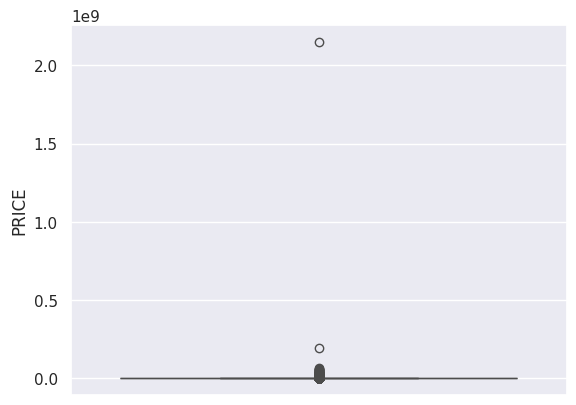

In [6]:
sns.boxplot(data = housing, y = 'PRICE')
plt.show()

By this boxplot we can see that we have some outliers. To deal with them we'll simply remove them from the dataset, since we're not planning on doing any analysis that are outliers related.</br>
To get any outlier we'll use the IQR techinique, we'll consider an outlier any data point that exceeds 1.5 of the inter quartile range from the first, or the third quartile.

In [7]:
Q1 = housing['PRICE'].quantile(.25)
Q3 = housing['PRICE'].quantile(.75)
IQR = Q3 - Q1
inf_limit = Q1 - 1.5 * IQR
sup_limit = Q3 + 1.5 * IQR

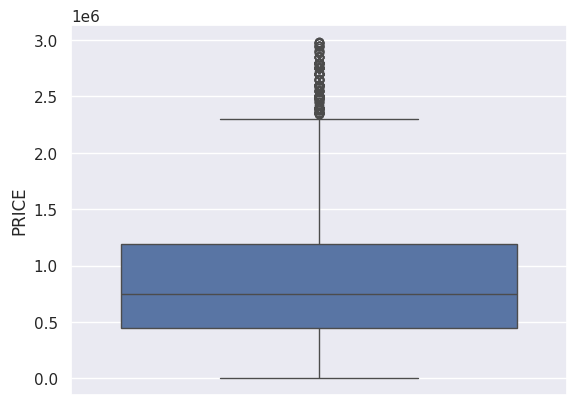

In [8]:
outliers_idx = (housing['PRICE'] < inf_limit) | (housing['PRICE'] > sup_limit)
housing = housing[~outliers_idx]
housing.reset_index (drop = True, inplace = True)
sns.boxplot(data = housing, y = 'PRICE')
plt.show()

Now we have eliminated the most problematic outliers. The next step is to select only the categorical atributes that we're going to use.

In [9]:
housing.columns

Index(['BROKERTITLE', 'TYPE', 'PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT',
       'ADDRESS', 'STATE', 'MAIN_ADDRESS', 'ADMINISTRATIVE_AREA_LEVEL_2',
       'LOCALITY', 'SUBLOCALITY', 'STREET_NAME', 'LONG_NAME',
       'FORMATTED_ADDRESS', 'LATITUDE', 'LONGITUDE'],
      dtype='object')

In [10]:
selected_columns = ['TYPE', 'PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT', 'SUBLOCALITY', 'LATITUDE', 'LONGITUDE']

selected_housing = housing[selected_columns]
selected_housing.head()

,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,SUBLOCALITY,LATITUDE,LONGITUDE
0,Condo for sale,315000,2,2.0,1400.000000,Manhattan,40.761255,-73.974483
1,House for sale,260000,4,2.0,2015.000000,Richmond County,40.541805,-74.196109
2,Condo for sale,69000,3,1.0,445.000000,New York County,40.761398,-73.974613
3,House for sale,690000,5,2.0,4004.000000,Kings County,40.674363,-73.958725
4,Condo for sale,899500,2,2.0,2184.207862,New York,40.809448,-73.946777


After that we're going to deal with the categorical columns changing them to become integers using the dummies technique. After that, only because the sublocality column will be useful in its string form, we'll save it to use in the df after.

In [11]:
sublocalities = selected_housing['SUBLOCALITY'].copy()

selected_housing = pd.get_dummies(selected_housing, dtype = int).copy()

selected_housing['SUBLOCALITY'] = sublocalities

selected_housing.head()

,PRICE,BEDS,BATH,PROPERTYSQFT,LATITUDE,LONGITUDE,TYPE_Co-op for sale,TYPE_Coming Soon,TYPE_Condo for sale,TYPE_Condop for sale,...,SUBLOCALITY_New York County,SUBLOCALITY_Queens,SUBLOCALITY_Queens County,SUBLOCALITY_Rego Park,SUBLOCALITY_Richmond County,SUBLOCALITY_Riverdale,SUBLOCALITY_Snyder Avenue,SUBLOCALITY_Staten Island,SUBLOCALITY_The Bronx,SUBLOCALITY
0,315000,2,2.0,1400.000000,40.761255,-73.974483,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Manhattan
1,260000,4,2.0,2015.000000,40.541805,-74.196109,0,0,0,0,...,0,0,0,0,1,0,0,0,0,Richmond County
2,69000,3,1.0,445.000000,40.761398,-73.974613,0,0,1,0,...,1,0,0,0,0,0,0,0,0,New York County
3,690000,5,2.0,4004.000000,40.674363,-73.958725,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Kings County
4,899500,2,2.0,2184.207862,40.809448,-73.946777,0,0,1,0,...,0,0,0,0,0,0,0,0,0,New York


## Task 1: Plotting price for area

First of all, I was requested to do a chart of the mean price of housing in each of the dataset sublocalities. It was also requested to highlight the  top 5 higher and lower mean prices in the city and to put with them the mean price of all the data.

To do that we'll simply group the dataframe by sublocality and then plot a barplot.

In [12]:
sublocality_mean_price = selected_housing.groupby('SUBLOCALITY')[['PRICE']].mean().copy()
sublocality_mean_price = sublocality_mean_price.sort_values('PRICE', ascending = False)

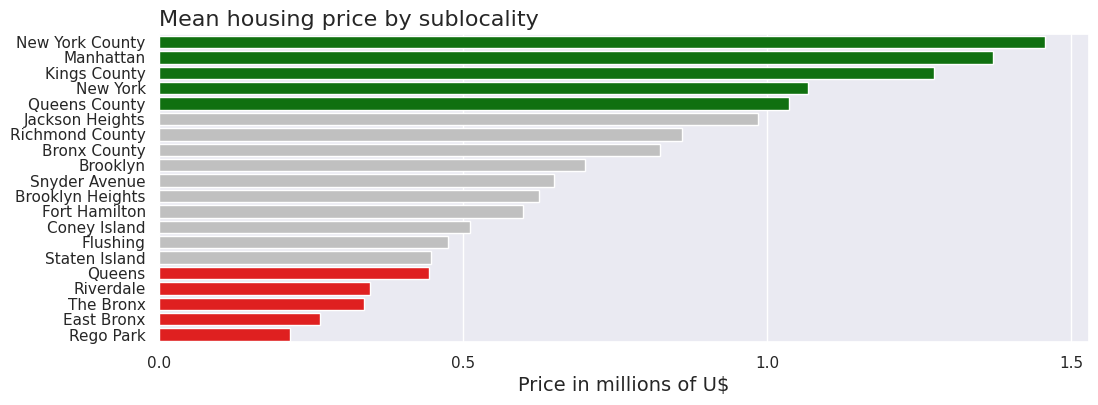

In [13]:
fig, ax = plt.subplots(figsize = (12,4))

colors = []
for i in range (len(sublocality_mean_price.index)):
  if i < 5:
    colors.append('green')
  elif i >= (len(sublocality_mean_price.index) - 5):
    colors.append('red')
  else:
    colors.append('silver')

ax = sns.barplot(data = sublocality_mean_price, x = 'PRICE', y = sublocality_mean_price.index, palette = colors, hue = sublocality_mean_price.index, orient = 'h')

ax.set_title ('Mean housing price by sublocality', loc = 'left', fontsize = 16)
ax.set_xlabel ('Price in millions of U$', fontsize = 14)
ax.set_ylabel ('')
ax.xaxis.set_major_locator(plt.MultipleLocator(500000))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.1f}'.format(x/1000000)))

plt.show()

In the precious chart we can clearly see a major discrepancy beetween mean price in different sublocalities. We can also see the top 5 more expensive sublocalities and more cheaper localities.

## Task 2: See if the price of a house has a correlation with the number of bedrooms, bathrooms or squarefootage.

After ploting the mean price for every region now the broker that I work for requested a visulization to show if the price of a property has a correlation with the house number of bedrooms, bathrooms or the size of the house to the most expensive sublocality. To make that, first we'll group our dataframe by region and them we're gonna plot 3  scatter plots New York County.

In [14]:
grouped_df = dict(tuple(selected_housing.groupby('SUBLOCALITY')[['PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT']]))
ny_county_df = grouped_df['New York County'].copy()

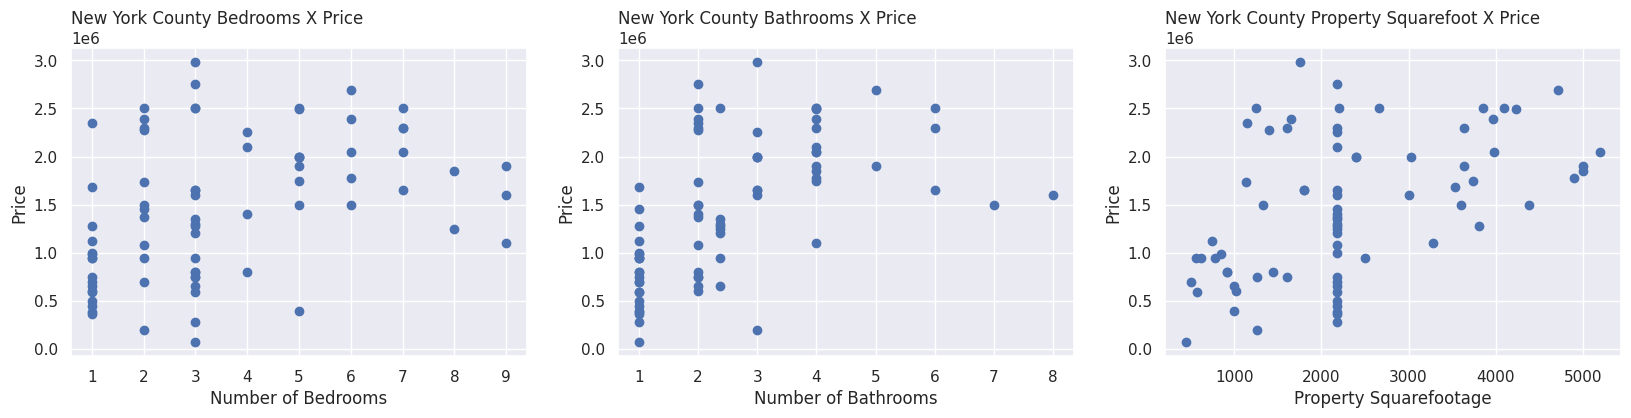

In [15]:
fig, axs = plt.subplots(1,3, figsize = (20,4))

axs[0].scatter(x = ny_county_df['BEDS'], y = ny_county_df['PRICE'])
axs[0].set_title ('New York County Bedrooms X Price', loc = 'left')
axs[0].set_xlabel('Number of Bedrooms')
axs[0].set_ylabel('Price')

axs[1].scatter(x = ny_county_df['BATH'], y = ny_county_df['PRICE'])
axs[1].set_title ('New York County Bathrooms X Price', loc = 'left')
axs[1].set_xlabel('Number of Bathrooms')
axs[1].set_ylabel('Price')

axs[2].scatter(x = ny_county_df['PROPERTYSQFT'], y = ny_county_df['PRICE'])
axs[2].set_title ('New York County Property Squarefoot X Price', loc = 'left')
axs[2].set_xlabel('Property Squarefootage')
axs[2].set_ylabel('Price')

plt.show()

Sadly this scatter plots didn't show us any obvious correlations beetween the 3 atributes analyzed and the price of a housing. But to be shure, we can calculate the correlation index for them.

In [16]:
ny_county_df.corr(numeric_only = True)

,PRICE,BEDS,BATH,PROPERTYSQFT
PRICE,1.000000,0.409434,0.555746,0.467844
BEDS,0.409434,1.000000,0.655921,0.656365
BATH,0.555746,0.655921,1.000000,0.590983
PROPERTYSQFT,0.467844,0.656365,0.590983,1.000000


After that we can conclude that at least for New York County the correlation beetween price and bedrooms, bathrooms or property area are not to strong.</br>
But after that we were asked to the same for the whole dataset, to see, if there is any trend the broker can follow.

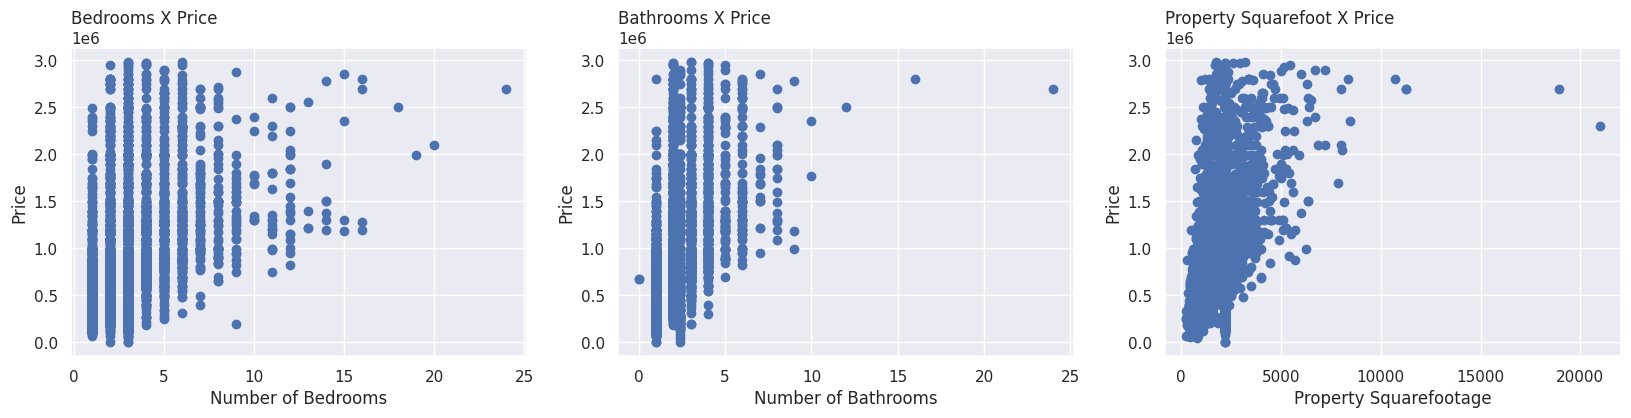

In [17]:
fig, axs = plt.subplots(1,3, figsize = (20,4))

axs[0].scatter(x = selected_housing['BEDS'], y = selected_housing['PRICE'])
axs[0].set_title ('Bedrooms X Price', loc = 'left')
axs[0].set_xlabel('Number of Bedrooms')
axs[0].set_ylabel('Price')

axs[1].scatter(x = selected_housing['BATH'], y = selected_housing['PRICE'])
axs[1].set_title ('Bathrooms X Price', loc = 'left')
axs[1].set_xlabel('Number of Bathrooms')
axs[1].set_ylabel('Price')

axs[2].scatter(x = selected_housing['PROPERTYSQFT'], y = selected_housing['PRICE'])
axs[2].set_title ('Property Squarefoot X Price', loc = 'left')
axs[2].set_xlabel('Property Squarefootage')
axs[2].set_ylabel('Price')

plt.show()

Again, if there is any correlation, is not that obvious, so we're going to calculate the index again.

In [18]:
selected_housing[['PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT', 'LATITUDE', 'LONGITUDE']].corr(numeric_only = True)

,PRICE,BEDS,BATH,PROPERTYSQFT,LATITUDE,LONGITUDE
PRICE,1.000000,0.430120,0.549659,0.448306,-0.063276,-0.125299
BEDS,0.430120,1.000000,0.759842,0.556233,-0.099674,0.026299
BATH,0.549659,0.759842,1.000000,0.595450,-0.134636,-0.035139
PROPERTYSQFT,0.448306,0.556233,0.595450,1.000000,-0.046449,-0.003051
LATITUDE,-0.063276,-0.099674,-0.134636,-0.046449,1.000000,0.541221
LONGITUDE,-0.125299,0.026299,-0.035139,-0.003051,0.541221,1.000000


Again, there is no strong correlation beetween the price and the numeric data.

## Task 3: Model of predctiction

As the last task of the job on this dataset it was requested for me to try to fit a linear regression model into the data.

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
model_dataset = selected_housing.drop('SUBLOCALITY', axis = 1)

train, test = train_test_split(model_dataset, test_size = 0.2)

train_y = train['PRICE']
train_x = train.drop('PRICE', axis = 1)

test_y = test['PRICE'].to_numpy()
test_x = test.drop('PRICE', axis = 1)

In [21]:
from sklearn.linear_model import LinearRegression
import numpy as np

In [22]:
model = LinearRegression()
model.fit(train_x, train_y)

LinearRegression()

In [23]:
predicted_y = model.predict(test_x)

In [30]:
from sklearn.metrics import mean_squared_error

In [31]:
mse = mean_squared_error(test_y, predicted_y)
np.sqrt(mse)

447235.3672935401

After the test, we can see that the linear regression can't predict the housing price in New York.